In [1]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [2]:
df = pd.read_csv('bankdata_reduced.csv') 

In [3]:
df.head()

,age,default,cons.price.idx,cons.conf.idx,y
0,56,no,93.994,-36.4,no
1,57,unknown,93.994,-36.4,no
2,37,no,93.994,-36.4,no
3,40,no,93.994,-36.4,no
4,56,no,93.994,-36.4,no


In [4]:
df['default'] = df['default'].map({'no':0,'yes':1,'unknown':0})
df['y'] = df['y'].map({'no':0,'yes':1})

In [5]:
X = df.drop('y',axis=1)
y= df['y']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42, stratify = y) 

In [6]:
rf = RandomForestClassifier() 
rf.fit(X_train,y_train) 

RandomForestClassifier()

In [7]:
y_pred = rf.predict(X_test)

In [8]:
accuracy = accuracy_score(y_test,y_pred) 
print("Accuracy:", accuracy) 

Accuracy: 0.8903860160233066


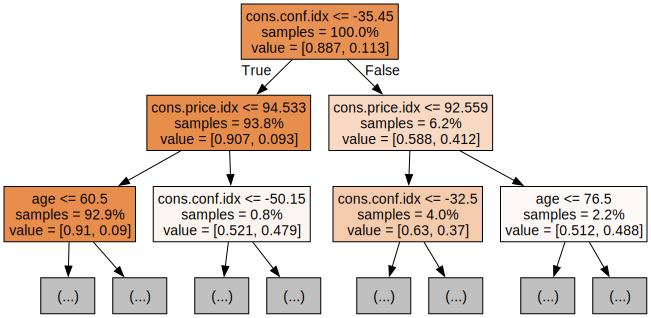

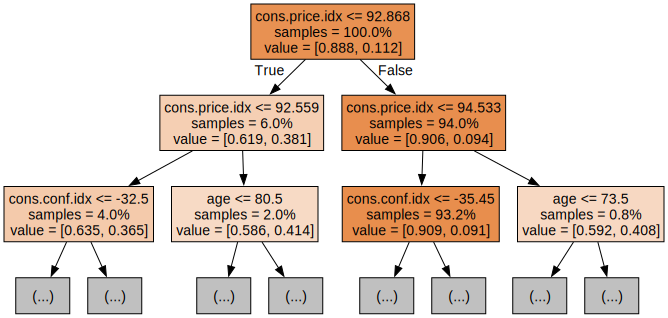

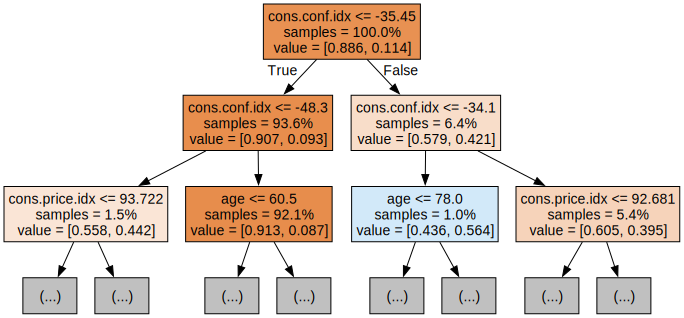

In [11]:

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [12]:
param_dist = {
  'n_estimators': randint(100, 500),
  'max_depth': randint(3, 15),
  'min_samples_split': randint(2, 10),
  'min_samples_leaf': randint(1, 5)
}


# Create a random forest classifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(
  rf, param_distributions=param_dist,
  n_iter=10, cv=5, scoring='accuracy',
  n_jobs=-1, random_state=42)



In [13]:
rand_search.fit(X_train,y_train) 

best_rf = rand_search.best_estimator_
print('Best hyperparameters:', rand_search.best_params_)

Best hyperparameters: {'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 9, 'n_estimators': 230}


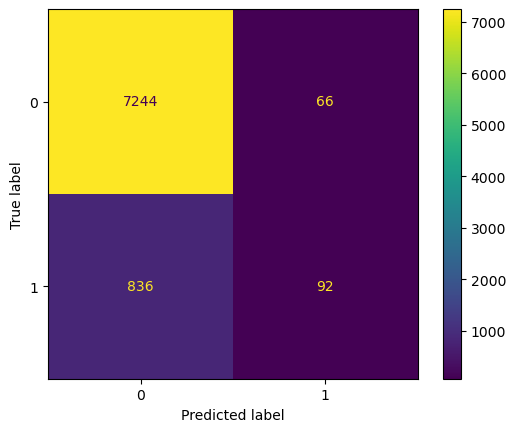

In [14]:
y_pred = best_rf.predict(X_test) 
cm = confusion_matrix(y_test,y_pred) 
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train) 
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8730274338431658
Precision: 0.40264026402640263
Recall: 0.2629310344827586
